# Binary Systems in Astrophysics WS 2021/2022

## 3 Searching for periodicities

For this tutorial we will shortly learn how to search for a period in some data.We will use gamma-ray data from the Large Area Telescope on board of the Fermi satellite (https://fermi.gsfc.nasa.gov/)

We will start discussing the possibility of searching for periods using the Lomb-Scargle algorithm, which is a method based on a Fourier transformation. There, we move from the time domain, to the Fourier space of frequencies:

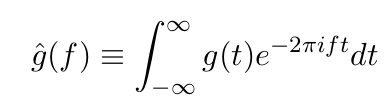'

where a sinusoidal signal can be reconstructed as a Dirac delta

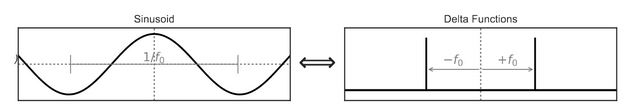

Then, to see which frequencies are present in a certain dataset make can compute a power spectrum as the following one:

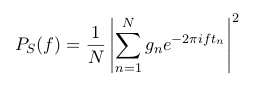

That's true, but astronomical observations generally come with a problem: our underlying baseline of observations is randomized i.e. telescopes observe a certain region of the sky when they can. In order to overcome this issue, we can use the generalized expression of the Lomb-Scargle algorithm:



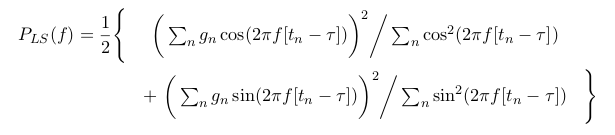

where

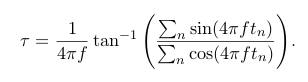

This modified periodogram differs on the original just that the determinators differ from N/2 (see VanderPlas 2018 for more details on the Lomb-Scargle periodogram - free access here https://arxiv.org/pdf/1703.09824.pdf)

One should always keep in mind a very well-known artifact: the repetition of exact aliases in the fourier space for frequencies larger than half of the spacing between observations.

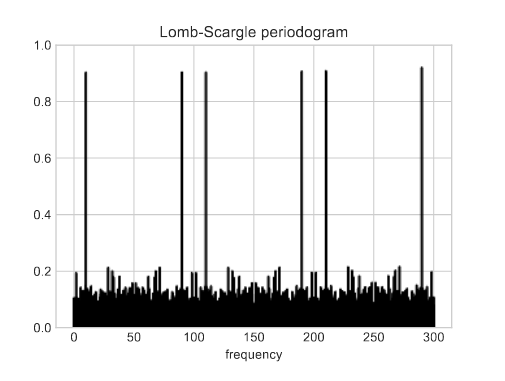

Image credit: VanderPlas 2018

Although it does not necessarily appear when using the Lomb-Scargle algorithm, it might reflect the periodicity of some observations (pay attention with Fermi-LAT data!).

But how do we use it? Let's create some noisy data (like in https://docs.astropy.org/en/stable/api/astropy.timeseries.LombScargle.html#astropy.timeseries.LombScargle)

In [1]:
import numpy as np
rand = np.random.default_rng(42)
t = 100 * rand.random(100)
y = np.sin(2 * np.pi * t) + rand.standard_normal(100) ## Period of 1 in arbitrary units

A Lomb-Scargle periodogram can be easily obtained with an automatically determined frecuency grid

In [2]:
from astropy.timeseries import LombScargle
frequency, power = LombScargle(t, y).autopower() 
# This generated two python arrays containing the values of the frequencies (grid)
# and power of the periodogram

In [3]:
frequency

array([1.03278036e-03, 3.09834109e-03, 5.16390182e-03, ...,
       2.57678701e+00, 2.57885257e+00, 2.58091813e+00])

If we represent the data...

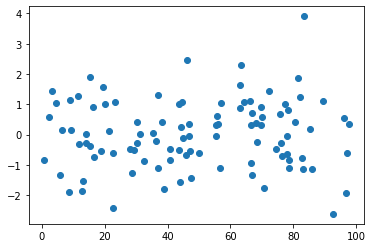

In [4]:
import matplotlib.pyplot as plt
plt.plot(t,y,'o')

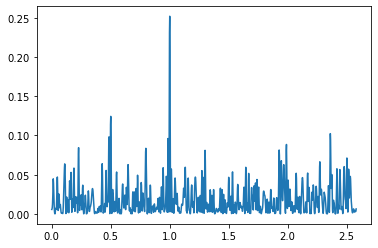

In [5]:
plt.plot(frequency,power)

It works? great! We could reconstruct the original period :D

Other things that might be useful:
- The parameter "dy" allows you to provide errors an introduce them in the LS, making it more realistic
- The parameter "samples_per_peak" gives you the oportunity to define how dense is your grid
- If the grid is not appropiately defined, you might need to define a maximum and minimum frequencies with "maximum_frequency" and "minimum_frequency", respectively

### Exercise

Use the LombScargle implementation in astropy to find the period of the binary LS 5039 in the Fermi-LAT data provided. Note that rates (counts/exposure) are more useful to search for periodicities given that they are less instrument-dependent. There is a second peak, to what instrumental effect does it correspond? (https://fermi.gsfc.nasa.gov/ssc/data/analysis/LAT_caveats_temporal.html)

Note: The time units are in MET (seconds after the beginning of the mission)! Also, observations are typically spaced 1 day.